# Examine the output from the simple MC run

In [53]:
%matplotlib inline

## Read (maybe should modify the file format!)

In [194]:
# Read (fast)
f = open('spec.dat','r')
lines = f.readlines()
f.close()

In [195]:
# Parse header
nlam, nx, ny = [int(ii) for ii in lines[0].split(' ')]
lam0, dlam, dx = [float(ii) for ii in lines[1].split(' ')]
print(nlam,nx,ny)

(240, 300, 300)


In [196]:
# Wavelength
wave  = lam0 + np.arange(nlam)*dlam

In [197]:
# x_arr
x_arr = np.arange(nx)*dx

In [198]:
# Generate farr for quick generation
farr = np.array( [float(line[0:16]) for line in lines[2:]] )   

In [199]:
# Data
data = np.zeros((nx,ny,nlam))
image = np.zeros((nx,ny))
flux = np.zeros(nlam)
cnt=0
for ii in range(nx):
    for jj in range(ny):
        data[ii,jj,:] = farr[cnt:cnt+nlam]
#        image[ii,jj] = np.sum(farr[cnt:cnt+nlam])
        cnt += nlam
# Collapsed Image
image = np.sum(data,2)
# Spectrum
flux = np.sum(data,0)
flux = np.sum(flux,0)

In [200]:
# Normalize (not really following this..)
# L_tot, nrm
L_tot = np.sum(data)
nrm = 1.
# dlambda
if nlam > 1:
    L_tot *= (wave[1] - wave[0])
    nrm *= (wave[1] - wave[0])*nlam
            
# spatial
if nx > 1:
    L_tot *= (x_arr[1] - x_arr[0])**2
    nrm *= (x_arr[1] - x_arr[0])**2
#
print('L_tot = {:g}, nrm = {:g}'.format(L_tot,nrm))

L_tot = 1.05313, nrm = 1.06667


## Examine

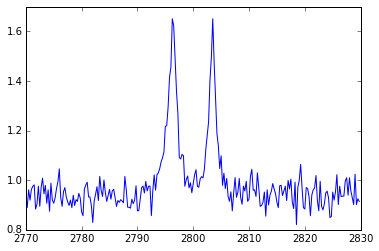

In [201]:
xdb.xplot(wave,flux)

/Users/xavier/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log10
  from IPython.kernel.zmq import kernelapp as app


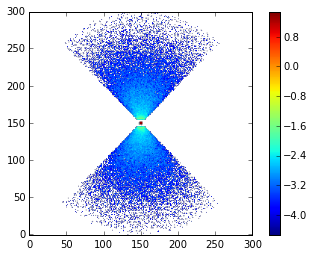

In [206]:
plt.clf()
plt.imshow(np.log10(image[:,:]), origin='lower')
#plt.imshow(data[:,:,109])
#plt.imshow(np.log10(data[:,:,107]),origin='lower')
plt.colorbar()
plt.show()

## Write to FITS

In [82]:
from xastropy.xutils import fits as xxf

In [203]:
xxf.write_quick_fits([data*nrm, wave, x_arr], 'wind_biconical45.fits')

Wrote: wind_biconical45.fits


In [204]:
x_arr.shape

(300,)

## Tests

In [182]:
wave[126]

2801.5